In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure inline plotting
%matplotlib inline

In [2]:
performance_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\PerformanceRating.csv', encoding='UTF-8-SIG')
satisfaction_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\SatisfiedLevel.csv', encoding='UTF-8-SIG')
employee_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Employee.csv', encoding='UTF-8-SIG')
education_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\EducationLevel.csv', encoding='UTF-8-SIG')
rating_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\RatingLevel.csv', encoding='UTF-8-SIG')

# Display the first few rows of each dataframe
performance_df.head(), satisfaction_df.head(), employee_df.head(), education_df.head(), rating_df.head()

(  PerformanceID EmployeeID ReviewDate  EnvironmentSatisfaction  \
 0          PR01  79F7-78EC   1/2/2013                        5   
 1          PR02  B61E-0F26   1/3/2013                        5   
 2          PR03  F5E3-48BB   1/3/2013                        3   
 3          PR04  0678-748A   1/4/2013                        5   
 4          PR05  541F-3E19   1/4/2013                        5   
 
    JobSatisfaction  RelationshipSatisfaction  TrainingOpportunitiesWithinYear  \
 0                4                         5                                1   
 1                4                         4                                1   
 2                4                         5                                3   
 3                3                         2                                2   
 4                2                         3                                1   
 
    TrainingOpportunitiesTaken  WorkLifeBalance  SelfRating  ManagerRating  
 0                       

In [3]:
performance_df.isnull().sum(), satisfaction_df.isnull().sum(), employee_df.isnull().sum(), education_df.isnull().sum(), rating_df.isnull().sum()

(PerformanceID                      0
 EmployeeID                         0
 ReviewDate                         0
 EnvironmentSatisfaction            0
 JobSatisfaction                    0
 RelationshipSatisfaction           0
 TrainingOpportunitiesWithinYear    0
 TrainingOpportunitiesTaken         0
 WorkLifeBalance                    0
 SelfRating                         0
 ManagerRating                      0
 dtype: int64,
 SatisfactionID       0
 SatisfactionLevel    0
 dtype: int64,
 EmployeeID                 0
 FirstName                  0
 LastName                   0
 Gender                     0
 Age                        0
 BusinessTravel             0
 Department                 0
 DistanceFromHome (KM)      0
 State                      0
 Ethnicity                  0
 Education                  0
 EducationField             0
 JobRole                    0
 MaritalStatus              0
 Salary                     0
 StockOptionLevel           0
 OverTime               

In [4]:
performance_df['ReviewDate'] = pd.to_datetime(performance_df['ReviewDate'], errors='coerce')
employee_df['HireDate'] = pd.to_datetime(employee_df['HireDate'], errors='coerce')

# Merge datasets
merged_df = pd.merge(performance_df, employee_df, on='EmployeeID')
merged_df = pd.merge(merged_df, satisfaction_df, left_on='SelfRating', right_on='SatisfactionID', how='left')
merged_df = pd.merge(merged_df, education_df, left_on='Education', right_on='EducationLevelID', how='left')
merged_df = pd.merge(merged_df, rating_df, left_on='ManagerRating', right_on='RatingID', how='left')

# Drop unnecessary columns
merged_df.drop(['SatisfactionID', 'EducationLevelID', 'RatingID'], axis=1, inplace=True)

# Display the first few rows of the merged dataframe
merged_df.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,SatisfactionLevel,EducationLevel,RatingLevel
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,...,Yes,2013-12-14,Yes,5,5,5,1,Satisfied,Masters,Exceeds Expectation
1,PR02,B61E-0F26,2013-01-03,5,4,4,1,3,4,4,...,Yes,2014-11-07,Yes,7,2,7,1,Satisfied,Bachelors,Meets Expectation
2,PR03,F5E3-48BB,2013-01-03,3,4,5,3,2,3,5,...,No,2015-01-13,Yes,3,0,2,1,Very Satisfied,Bachelors,Exceeds Expectation
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,...,Yes,2015-05-11,Yes,6,5,6,2,Neutral,High School,Needs Improvement
4,PR05,541F-3E19,2013-01-04,5,2,3,1,0,4,4,...,Yes,2014-04-02,Yes,1,0,0,1,Satisfied,No Formal Qualifications,Meets Expectation


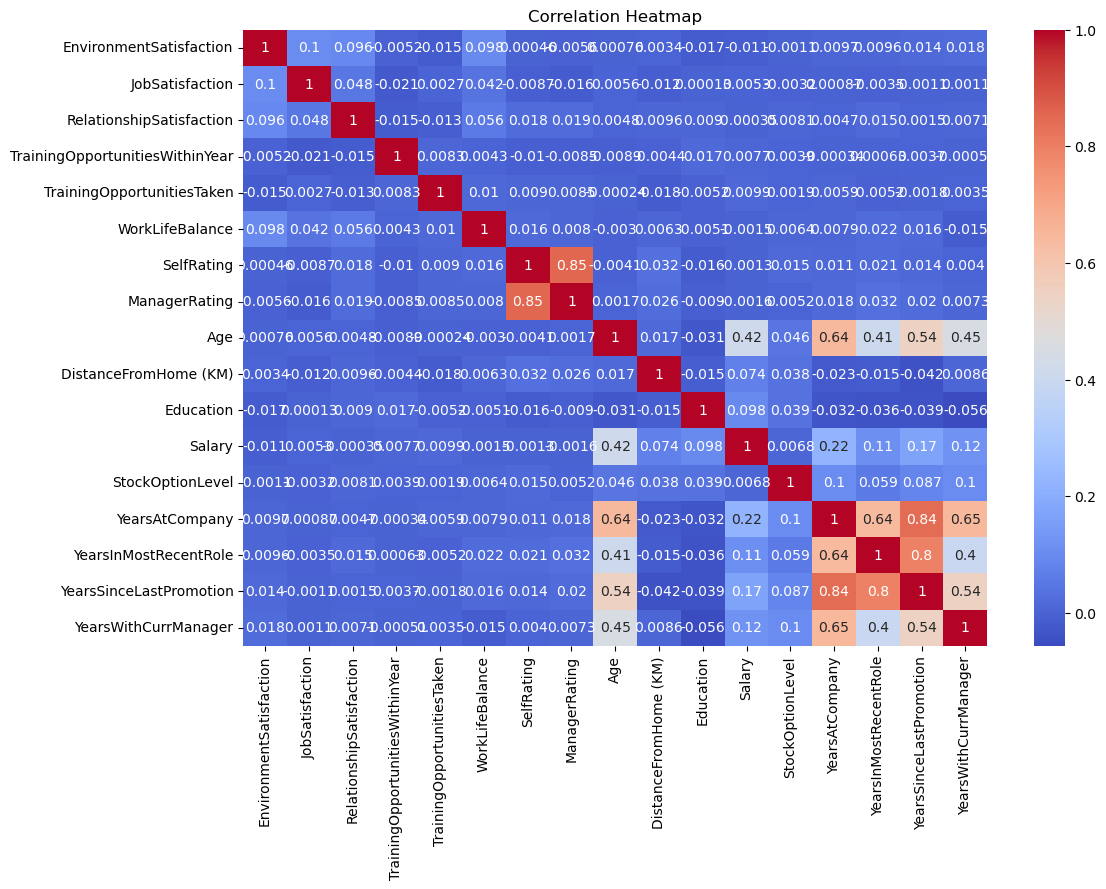

In [5]:
numeric_df = merged_df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

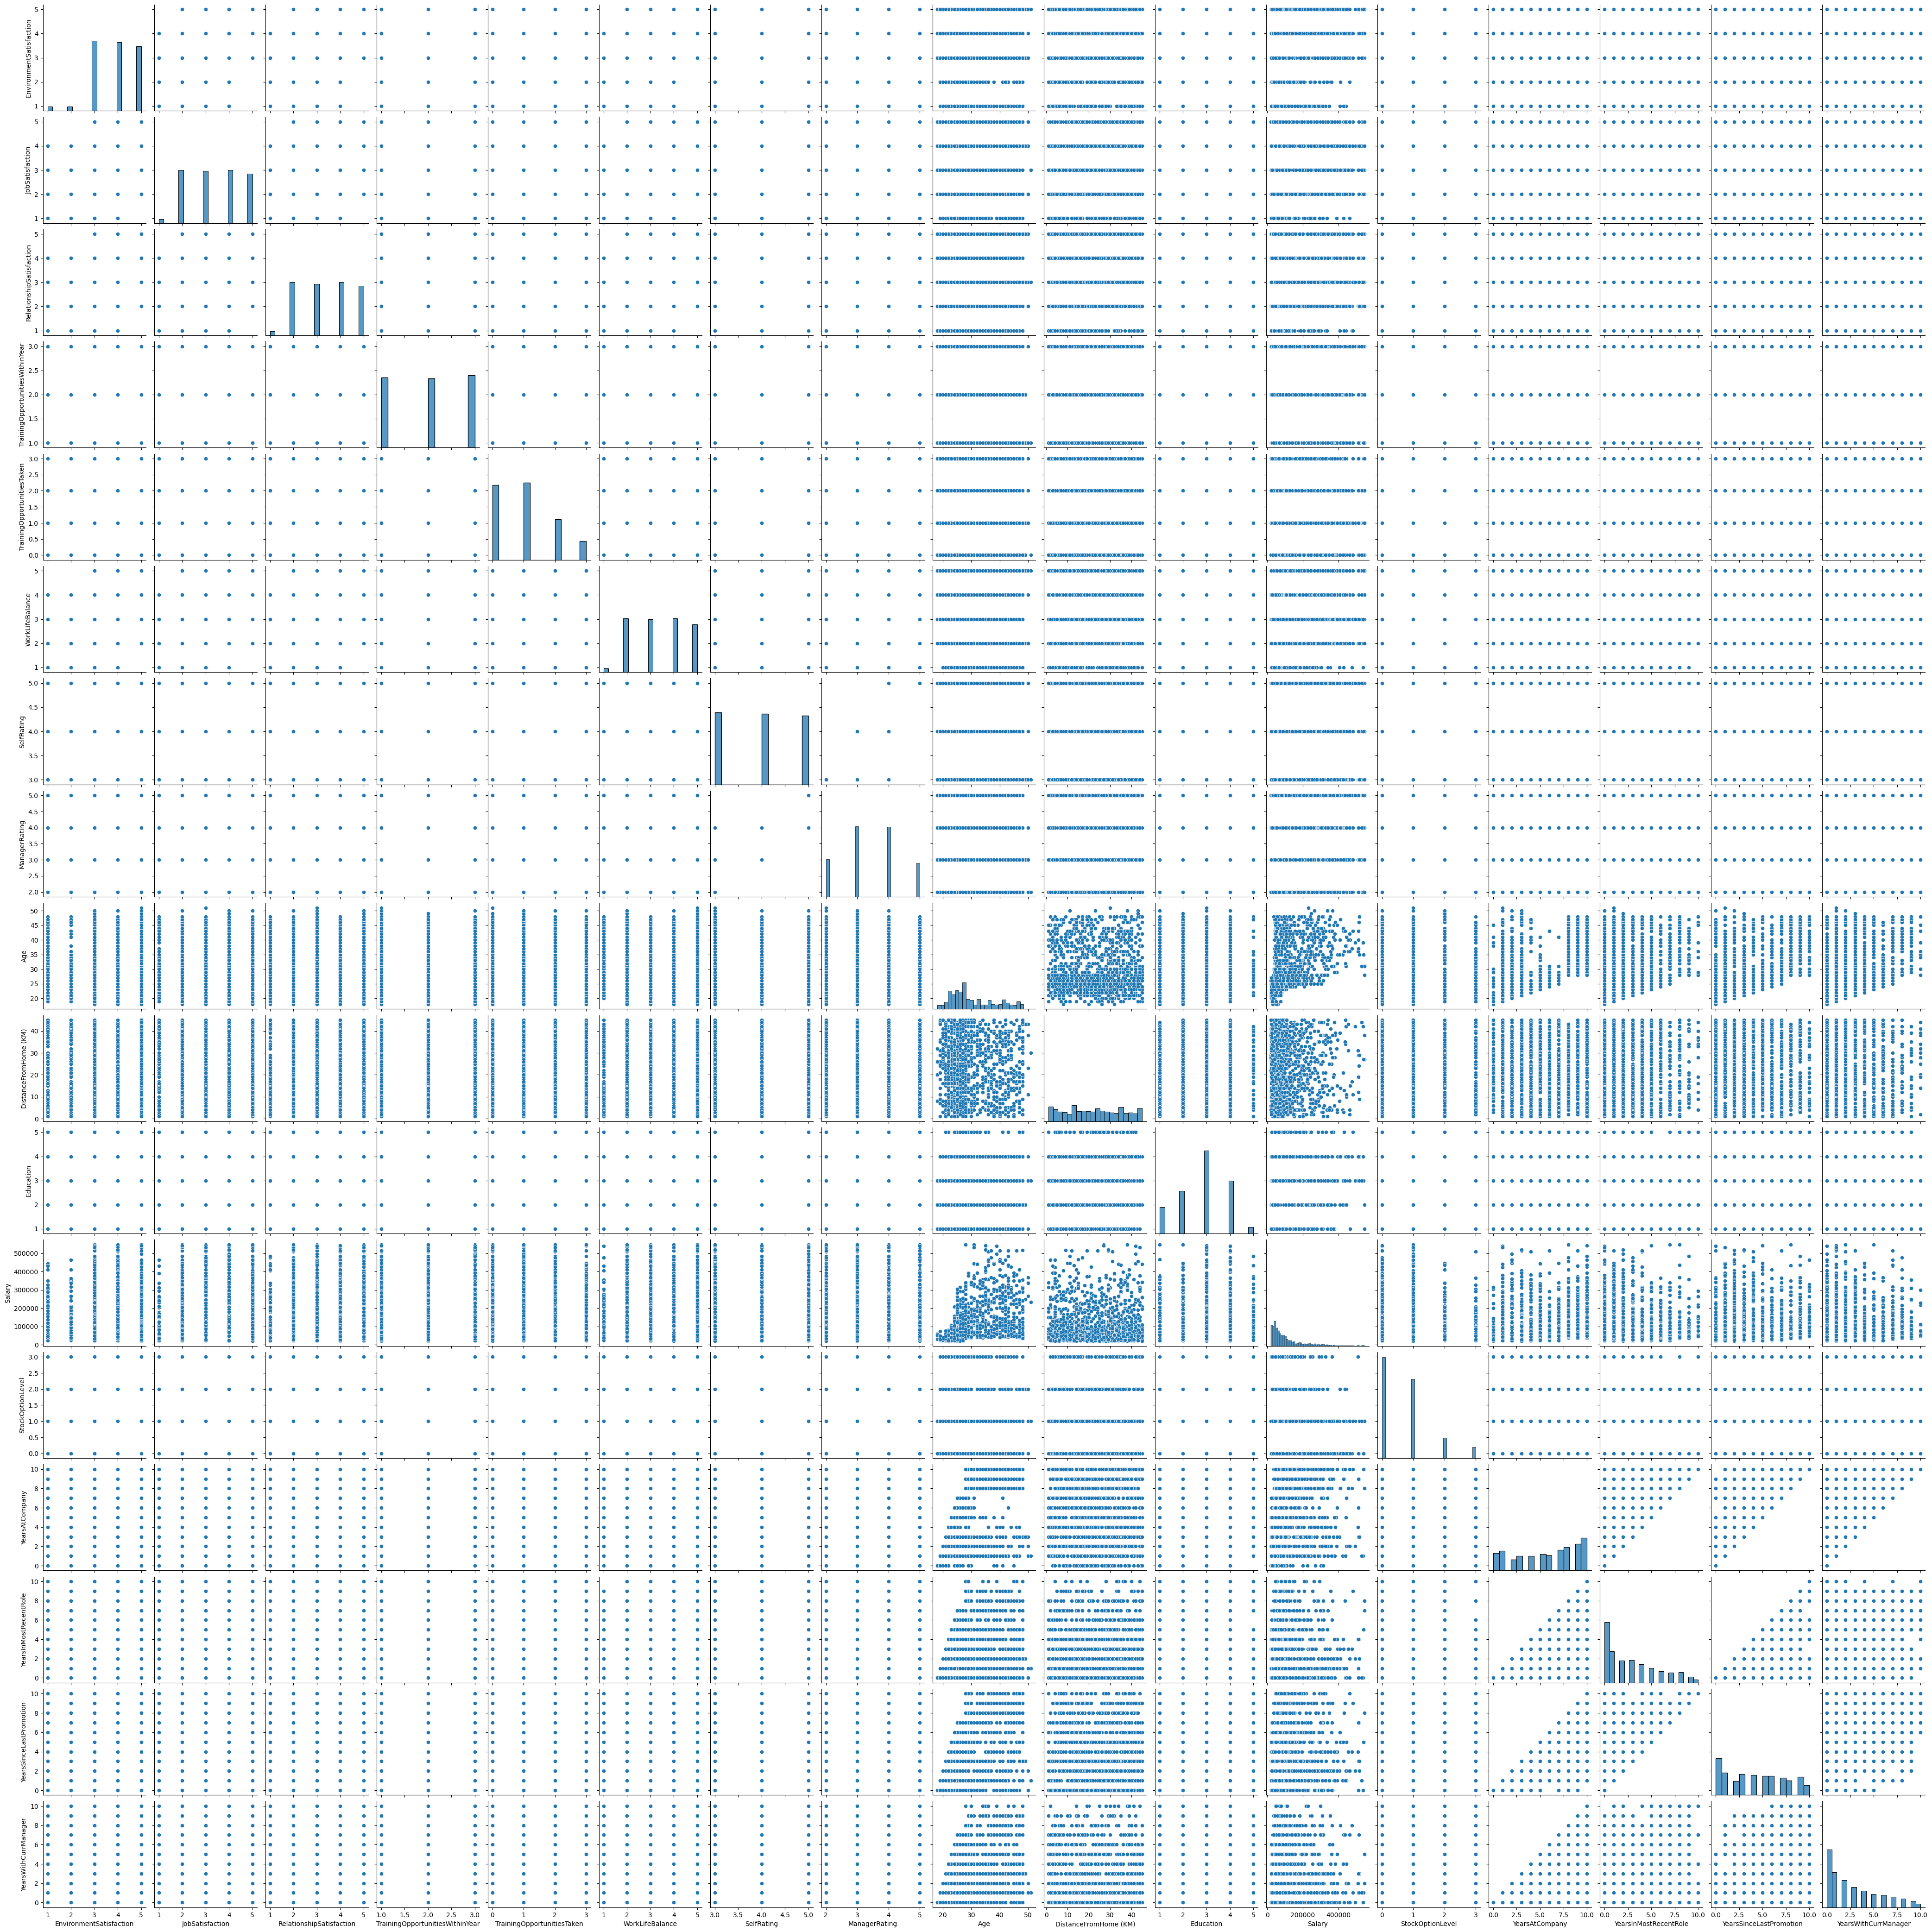

In [6]:
sns.pairplot(numeric_df)
plt.show()

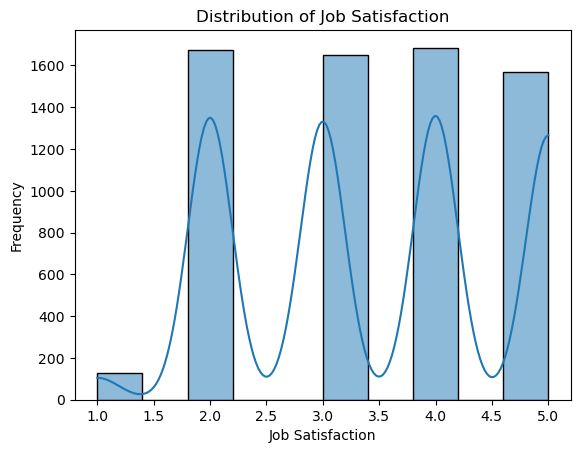

In [7]:
sns.histplot(merged_df['JobSatisfaction'], bins=10, kde=True)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.show()

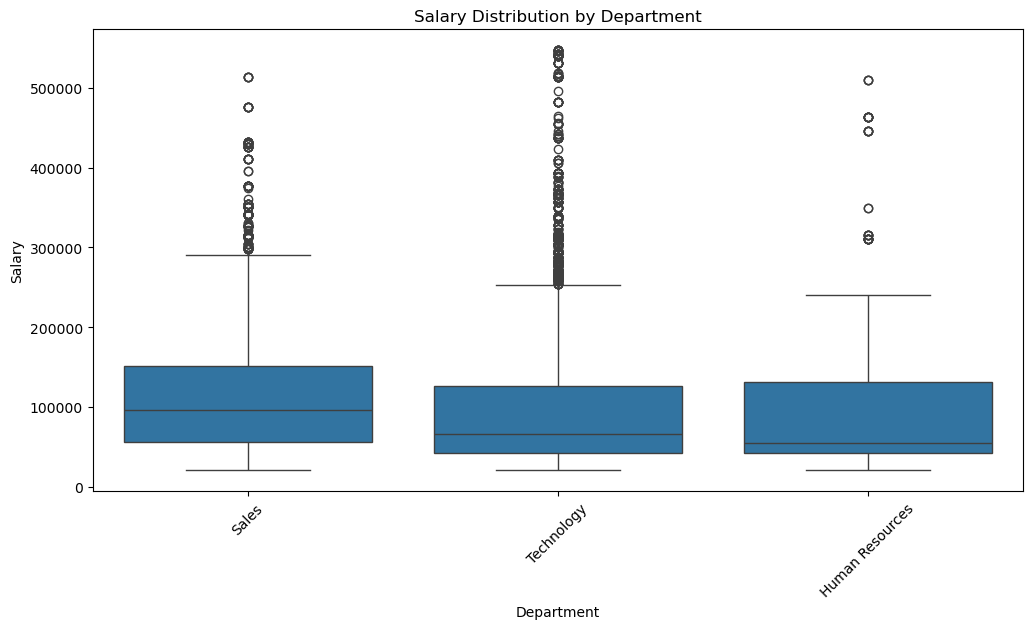

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Salary', data=merged_df)
plt.title('Salary Distribution by Department')
plt.xticks(rotation=45)
plt.show()

In [9]:
X = merged_df.drop(['Attrition', 'EmployeeID', 'FirstName', 'LastName', 'ReviewDate', 'HireDate'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = merged_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.9716840536512668,
 array([[1299,   24],
        [  33,  657]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98      1323\n           1       0.96      0.95      0.96       690\n\n    accuracy                           0.97      2013\n   macro avg       0.97      0.97      0.97      2013\nweighted avg       0.97      0.97      0.97      2013\n')

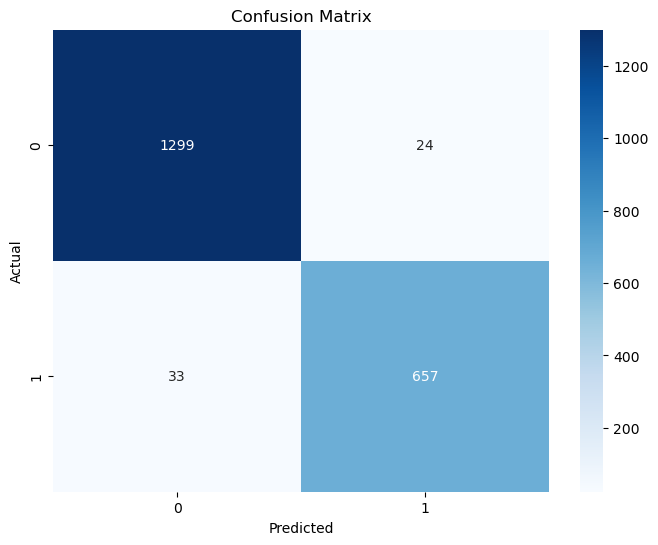

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()